# 10.1 ЭПР

In [74]:
import sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt
import math
from common import *

In [75]:
def getB(V__, omega__, d__, n__):
  return V__ / (n__ * omega__ * np.pi * d__**2 / 4)

In [76]:
rez_freq = 162 * 1e6 # HZ
mod_freq = 2 * np.pi * 50 # HZ

latex_measurement("f_{res}", rez_freq, 1e6, "МГц", 1)

$f_{res} = (1.6 \pm 0.0)\ \times 10^{8} ~\text{МГц} \ (\varepsilon \approx 0.6\ \%)$


'$f_{res} = (1.6 \\pm 0.0)\\ \\times 10^{8} ~\\text{МГц} \\ (\\varepsilon \\approx 0.6\\ \\%)$'

In [77]:
# 7
v_resistor       = [177, 180, 179, 179] # mV
v_resistor_      = [v / 1e3 for v in v_resistor]

v_resistor_mean_ = np.mean(v_resistor_)
sigma_v_resistor = np.std(v_resistor_)
latex_measurement("V_{res}", v_resistor_mean_ * 1000, sigma_v_resistor * 1000, "мB", 2)

$V_{res} = (1.79 \pm 0.01)\ \times 10^{2} ~\text{мB} \ (\varepsilon \approx 0.61\ \%)$


'$V_{res} = (1.79 \\pm 0.01)\\ \\times 10^{2} ~\\text{мB} \\ (\\varepsilon \\approx 0.61\\ \\%)$'

In [78]:
# 8
v_probny_raw = [[15.35, 12.18],  # mV I ~ 180 mV
                [0.085, 0.07],   # mV I ~ 10 mV
                [2.59, 2.05],    # mV I ~ 30 mV
                [5.88, 4.78],    # mV I ~ 70 mV
                [10.13, 8.27],   # mV I ~ 120 mV
                [13.4, 10.91],   # mV I ~ 160.5 mV
                [15.03, 12.28],  # mV I ~ 180.1 mV
                [16.61, 13.53]]  # mV I ~ 199.2 mV
sigma_v = 0.01 # mV
v_probny  = [np.mean(v) for v in v_probny_raw]
sigma_v_probny  = [np.abs(v[1] - v[0]) / 2 + sigma_v for v in v_probny_raw]
v_probny_ = [v / 1e3 for v in v_probny] # V
sigma_v_probny_  = [v / 1e3 for v in sigma_v_probny]
U  = [180, 10, 30, 70, 120, 160.5, 180.1, 199.2] # mV
U_ = [u / 1e3 for u in U] # V
r_ = .75 # om
I_ = [u / r_ / 1e3 for u in U] # A
sigma_I = [0.1 / r_ / 1e3] * len(I_)
v_probny_, I_

([np.float64(0.013765000000000001),
  np.float64(7.750000000000001e-05),
  np.float64(0.00232),
  np.float64(0.00533),
  np.float64(0.0092),
  np.float64(0.012155000000000001),
  np.float64(0.013654999999999999),
  np.float64(0.01507)],
 [0.24,
  0.013333333333333334,
  0.04,
  0.09333333333333332,
  0.16,
  0.214,
  0.24013333333333334,
  0.26559999999999995])

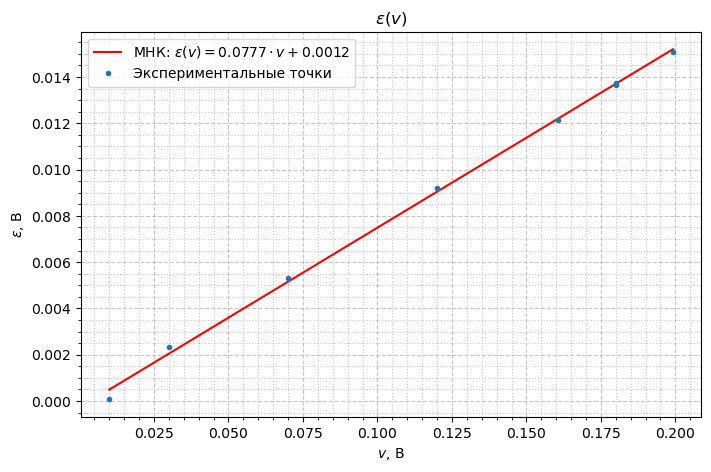

0.07774846876888875


np.float64(0.013613414337852549)

In [79]:
x = np.array(U_)
y = np.array(v_probny_)
sigma_x = [0] * len(x)
sigma_y = [0] * len(y)

plt.figure(figsize=(8, 5))
plt.errorbar(x, y, fmt='.', capsize=8, label=r'Экспериментальные точки')

# Linear fit (МНК)
coeffs = np.polyfit(x, y, 1)
coeffs =  LeastSquares(x, y)
linear_fit = np.poly1d(coeffs[:2])

# Generate smooth values for the fitted line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_fit(x_fit)
plt.plot(x_fit, y_fit, 'r', label=f'МНК: $\\varepsilon (v) = {coeffs[0]:.4f} \\cdot v + {coeffs[2]:.4f}$')

# Labels and title
plt.xlabel('$v$, В')
plt.ylabel('$\\varepsilon$, В')
plt.title("$\\varepsilon(v)$")

# Grid and legend
plt.minorticks_on()
plt.grid(True, linestyle='--', alpha=0.7, which='major')
plt.grid(True, linestyle=':',  alpha=0.7, which='minor')
plt.legend()
plt.show()
print(coeffs[0])

epsilon = coeffs[0] * v_resistor_mean_ + coeffs[1]
epsilon


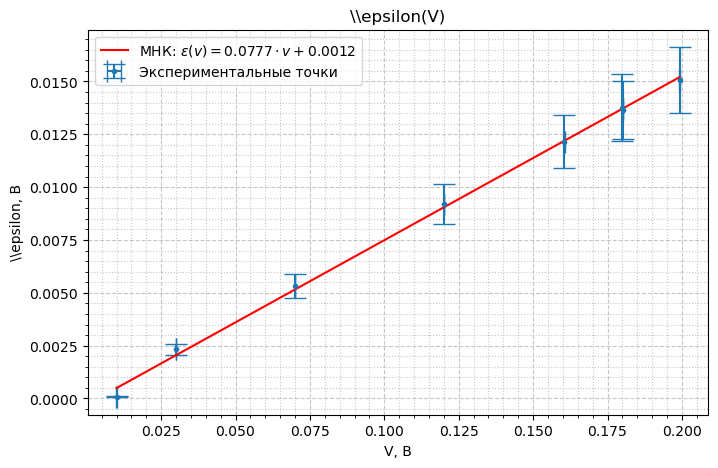

$k = (7.77 \pm 0.12)\ \times 10^{-2} ~\text{} \ (\varepsilon \approx 1.54\ \%)$


'$k = (7.77 \\pm 0.12)\\ \\times 10^{-2} ~\\text{} \\ (\\varepsilon \\approx 1.54\\ \\%)$'

In [80]:
coeffs = linear_graph(U_, v_probny_, [0.1 / 1e3] * len(U_), sigma_v_probny_, "V, B", r"\\epsilon, B", r"\\epsilon(V)")
epsilon = coeffs[0] * v_resistor_mean_ + coeffs[1]
sigma_epsilon = np.sqrt((coeffs[2] * v_resistor_mean_)**2 + coeffs[3]**2)

latex_measurement("k", coeffs[0], coeffs[2], "", 2)

In [81]:
h_plank       = 1.054 * 10**-34
omega_0       = 162.1 * 10**6 * 2 * np.pi
magneton_bora = 927.4 * 10**-26

In [82]:
# пробная катушка
d       = 14.9 # mm
d_      = d / 1e3
sigma_d = .1   # mm
sigma_d_ = sigma_d / 1e3
n = 44
s_ = np.pi * d_**2 / 4
sigma_s_ = np.pi / 4 * 2 * d_ * sigma_d_

latex_measurement("S", s_ * 1e4, sigma_s_ * 1e4, "см^2", 2)

b_ = getB(epsilon, mod_freq, d_, n)
sigma_b_ = np.sqrt((sigma_epsilon / s_ / n / 2 / np.pi / 50)**2 +
                   (sigma_s_ / s_ / n / 2 / np.pi / 50)**2)

latex_measurement("B_0", b_, sigma_b_, "Тл", 2)

g_ = h_plank * omega_0 / (magneton_bora * b_)
sigma_g_ = g_ * sigma_b_ / b_
latex_measurement("g", g_, sigma_g_, "", 2)
b_, g_

$S = (1.74 \pm 0.02)\ \text{см^2} \ (\varepsilon \approx 1.34\ \%)$
$B_0 = (5.65 \pm 0.11)\ \times 10^{-3} ~\text{Тл} \ (\varepsilon \approx 1.99\ \%)$
$g = (2.05 \pm 0.04)\ \text{} \ (\varepsilon \approx 1.99\ \%)$


(np.float64(0.005648096335237939), np.float64(2.0494357466752633))

In [83]:
Delta_l = 0.5
sigma_delta_l = 0.1

Double_L = 6.8
sigma_double_l = 0.1

delta_b = Delta_l/Double_L * b_

sigma_delta_b = np.sqrt(
  (sigma_delta_l/Double_L*b_)**2 +
  (sigma_double_l * Delta_l/ Double_L**2 * b_)**2 +
  (sigma_b_ * Delta_l / Double_L)**2
)

latex_measurement("\\Delta B", delta_b * 1e3, sigma_delta_b * 1e3, "мТл", 2)

$\Delta B = (4.15 \pm 0.84)\ \times 10^{-1} ~\text{мТл} \ (\varepsilon \approx 20.15\ \%)$


'$\\Delta B = (4.15 \\pm 0.84)\\ \\times 10^{-1} ~\\text{мТл} \\ (\\varepsilon \\approx 20.15\\ \\%)$'